# Movie Recommendation System

In this project, we'll be looking to create a movie recommendation system based on user ratings system. We've collected datasets with over 100000 users who've rated movies of different genres. The system will detect movies similar to the movies which have been rated by the user.

### Importing Libraries & Dataset

First, we'll import the pandas and numpy libraries. We have two separate datasets involving the movie id, title and the user ifd and ratings columns, which we'll merge together into one dataframe.

In [1]:
import pandas as pd
import numpy as np

movcols = ['movieId', 'title']
movies = pd.read_csv('movies.csv', usecols = movcols)

ratcols = ['userId', 'movieId', 'rating']
ratings = pd.read_csv('ratings.csv', usecols = ratcols)

ratings = pd.merge(movies, ratings)

ratings.head()

,movieId,title,userId,rating
0,1,Toy Story (1995),1,4.0
1,1,Toy Story (1995),5,4.0
2,1,Toy Story (1995),7,4.5
3,1,Toy Story (1995),15,2.5
4,1,Toy Story (1995),17,4.5


### Sorting Values

Now, we create a seperate dataframe which will find out the average user ratings of all the movies in the database.

In [2]:
ratingsdf = pd.DataFrame(ratings.groupby('title')['rating'].mean())

ratingsdf.head()

,rating
title,
'71 (2014),4.0
'Hellboy': The Seeds of Creation (2004),4.0
'Round Midnight (1986),3.5
'Salem's Lot (2004),5.0
'Til There Was You (1997),4.0


In the same dataframe, we'll add a new column which will show as to how many times a particular movie was rated.

In [3]:
ratingsdf['numberofratings'] = pd.DataFrame(ratings.groupby('title')['rating'].count())

ratingsdf.head()

,rating,numberofratings
title,,
'71 (2014),4.0,1
'Hellboy': The Seeds of Creation (2004),4.0,1
'Round Midnight (1986),3.5,2
'Salem's Lot (2004),5.0,1
'Til There Was You (1997),4.0,2


### Data Visualization

Now, we'll use matplotlib and seaborn to visualize the countplot graph of the ratings to grasp the overall pattern of ratings given to the movies by all the users. Also, we'll use a histogram to visualize the distribuition of the number of times a movie was rated.

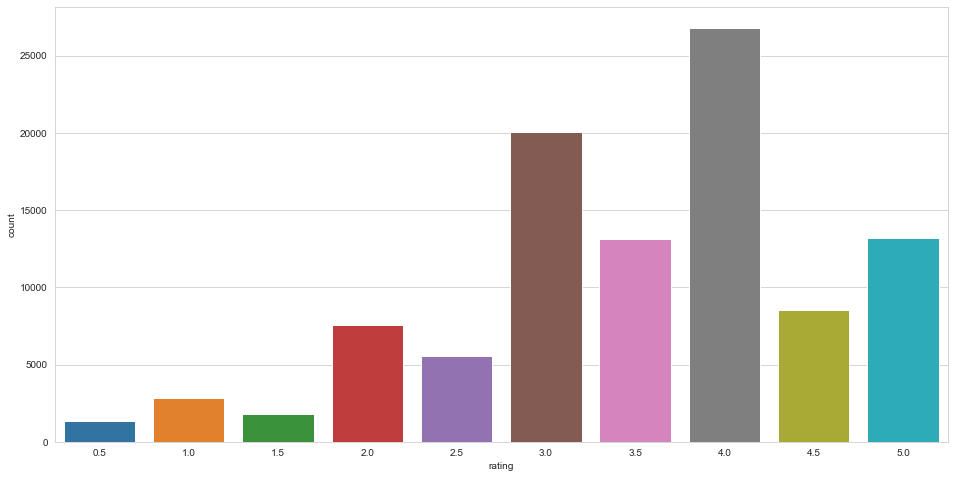

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style('whitegrid')
plt.figure(figsize=(16,8))
sns.countplot(x='rating',data=ratings)

plt.show()

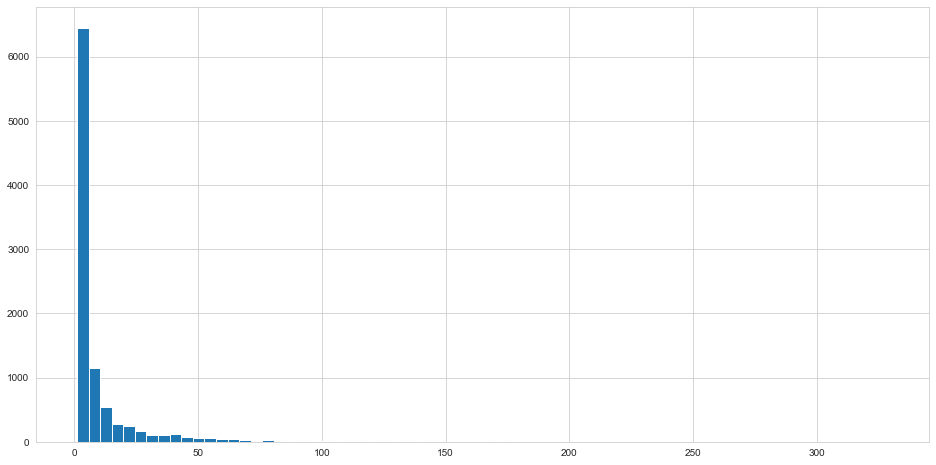

In [7]:
plt.figure(figsize=(16,8))
ratingsdf['numberofratings'].hist(bins=70)
plt.show()

Finally, we'll use what's called a jointplot to view both the ratings and the number of ratings alongside each other in the form of scatter graph and bar graph. The thicker the density is in a certain portion of the scatter graph, the ratings and the total count of them are the most in that number region.

<Figure size 1152x576 with 0 Axes>

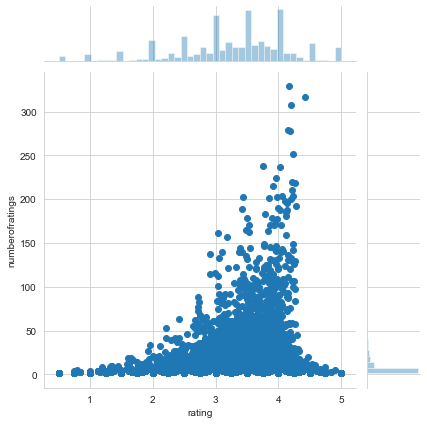

In [9]:
plt.figure(figsize=(16,8))
sns.jointplot(x='rating', y='numberofratings', data=ratingsdf)

plt.show()

From the graphs above, we see that most of the movies in the dataframe have gotten a rating of 3.0 and above. The highest amount of movies belong in the 4.0 rating category, followed by 3.0. This suggests that most films in the database have gotten good to great reviews by the user. Also most movies in the database were reviewed sparsely, with only a smaller number of films were reviewed over 100 times.

### Building A Recommender System

#### Based On A Particular Movie

For a recommeder system, we'll have two different approaches - firstly, based on a particular movie and secondly, based on a particular user. First, let's try out the movie based recommendation system.

Now, we'll create another dataframe which will have the user ids as the index and the movie titles as the column names. The user ratings will be the values of that dataframe. Note that, most of the values are NaN, as most movies in the database are not seen or reviewed by the bulk of the users.

In [12]:
userRatings = ratings.pivot_table(index=['userId'], columns=['title'], values='rating')

userRatings.head()

title,'71 (2014),'Hellboy': The Seeds of Creation (2004),'Round Midnight (1986),'Salem's Lot (2004),'Til There Was You (1997),'Tis the Season for Love (2015),"'burbs, The (1989)",'night Mother (1986),(500) Days of Summer (2009),*batteries not included (1987),...,Zulu (2013),[REC] (2007),[REC]² (2009),[REC]³ 3 Génesis (2012),anohana: The Flower We Saw That Day - The Movie (2013),eXistenZ (1999),xXx (2002),xXx: State of the Union (2005),¡Three Amigos! (1986),À nous la liberté (Freedom for Us) (1931)
userId,,,,,,,,,,,,,,,,,,,,,
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.0,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Next step is to check out a series where we've sorted the previously found dataframe based on the number of ratings. This will give us the list where we'll see all the movies which most users have seen or rated.

In [10]:
ratingsdf.sort_values('numberofratings', ascending=False).head(10)

,rating,numberofratings
title,,
Forrest Gump (1994),4.164134,329
"Shawshank Redemption, The (1994)",4.429022,317
Pulp Fiction (1994),4.197068,307
"Silence of the Lambs, The (1991)",4.161290,279
"Matrix, The (1999)",4.192446,278
Star Wars: Episode IV - A New Hope (1977),4.231076,251
Jurassic Park (1993),3.750000,238
Braveheart (1995),4.031646,237
Terminator 2: Judgment Day (1991),3.970982,224


Now, we'll pick any two movies for our attempt at a movie based recommendation system. The first one will be Forrest Gump, which is an Academy Award winning drama film. The second one will be Braveheart, a historical action film. Let's pick out their respective user ratings from the userRatings dataframe and store them in seperate series.

In [16]:
GumpRatings = userRatings['Forrest Gump (1994)']
BraveRatings = userRatings['Braveheart (1995)']

Now, we'll use the pandas correlation function to find similar movies with the two selected movies. First, let's try it out with Forrest Gump. We store the correlated movies in a seperate dataframe and drop the NaN values.

In [19]:
GumpCorr= userRatings.corrwith(GumpRatings)
BraveCorr = userRatings.corrwith(BraveRatings)
Gumpdf = pd.DataFrame(GumpCorr, columns=['Correlation'])
Gumpdf.dropna(inplace=True)

Gumpdf.head()

,Correlation
title,
"'burbs, The (1989)",0.197712
(500) Days of Summer (2009),0.234095
*batteries not included (1987),0.892710
...And Justice for All (1979),0.928571
10 Cent Pistol (2015),-1.000000


Now, we have to think about which type of movies to suggest. Remember when we found out that, plenty of movies were only reviewed a handful of times in this system. Generally, a common person might not want to see such obscure indie films. So, our criteria should be that the films that get recommended by the system will have to get rated at least 100 times to make it a common theatrical movie. Hence now, we add the number of ratings column to our new Forrest Gump correlation dataframe to filter out the obscure films.

In [21]:
Gumpdf = Gumpdf.join(ratingsdf['numberofratings'])

Gumpdf.head()

,Correlation,numberofratings
title,,
"'burbs, The (1989)",0.197712,17
(500) Days of Summer (2009),0.234095,42
*batteries not included (1987),0.892710,7
...And Justice for All (1979),0.928571,3
10 Cent Pistol (2015),-1.000000,2


Now, we filter to find out the movies similar to Forrest Gump, which have been rated 100 times.

In [22]:
Gumpdf[Gumpdf['numberofratings'] > 100].sort_values('Correlation', ascending=False).head(10)

,Correlation,numberofratings
title,,
Forrest Gump (1994),1.000000,329
Good Will Hunting (1997),0.484042,141
Aladdin (1992),0.464268,183
American History X (1998),0.457287,129
"Truman Show, The (1998)",0.432556,125
Braveheart (1995),0.416976,237
Ferris Bueller's Day Off (1986),0.405830,109
Mrs. Doubtfire (1993),0.401408,144
Full Metal Jacket (1987),0.397241,102


We now see what the system will recommend the user if he's rated Forrest Gump. We see movies like Good Will Hunting, American History X, The Truman Show etc. which are some excellent drama movies, which will definitely be enjoyable to someone who's watched Forrest Gump.

We'll follow the same approach to see the recommended films for the users who've watched Braveheart.

In [23]:
Bravedf = pd.DataFrame(BraveCorr, columns=['Correlation'])
Bravedf.dropna(inplace=True)
Bravedf = Bravedf.join(ratingsdf['numberofratings'])
Bravedf[Bravedf['numberofratings'] > 100].sort_values('Correlation', ascending=False).head(10)

,Correlation,numberofratings
title,,
Braveheart (1995),1.000000,237
Batman Begins (2005),0.610550,116
Ocean's Eleven (2001),0.575751,119
Inception (2010),0.555414,143
"Matrix, The (1999)",0.496045,278
American History X (1998),0.492451,129
Terminator 2: Judgment Day (1991),0.484246,224
Donnie Darko (2001),0.477303,109
Die Hard (1988),0.476831,145


For Braveheart watchers, we see the system recommending movies like "Batman Begins", "Terminator 2" and "The Matrix", which are all iconic action films, quite similar to Braveheart's genre. Hence, we can see that the recommender system works really well if the system is based on a particualr movie.

In [ ]:
ratingCorr = userRatings.corr(method='pearson', min_periods=150)

ratingCorr.head()

We'll now take a user from the dataset as an example, let's say user id number 10. We'll take a look at his rated movies list.

In [7]:
sampRatings = userRatings.loc[10].dropna()

sampRatings

title
27 Dresses (2008)                  3.0
300 (2007)                         3.0
50 First Dates (2004)              3.5
About Time (2013)                  4.0
About a Boy (2002)                 3.5
                                  ... 
What a Girl Wants (2003)           3.0
When Harry Met Sally... (1989)     3.0
White House Down (2013)            4.0
Wolf of Wall Street, The (2013)    1.0
Yes Man (2008)                     0.5
Name: 10, Length: 140, dtype: float64

Based on the list, we'll try to use the correlation function to find similar movies to the list. We'll append all the similar movies to a series called suggestions.

In [8]:
suggestions = pd.Series()

for i in range(0, len(sampRatings.index)):
    sim = ratingCorr[sampRatings.index[i]].dropna()
    
    sim = sim.apply(lambda x: x * sampRatings[i])
    
    suggestions = suggestions.append(sim)
    
print()
print('Sorting..')
print()
    
suggestions.sort_values(inplace=True, ascending=False)
suggestions.head(10)

C:\Users\User\anaconda3\lib\site-packages\ipykernel_launcher.py:1: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  """Entry point for launching an IPython kernel.



Sorting..



Shrek (2001)                                                 4.500000
Aladdin (1992)                                               4.000000
Lord of the Rings: The Two Towers, The (2002)                4.000000
Gladiator (2000)                                             4.000000
Lord of the Rings: The Fellowship of the Ring, The (2001)    4.000000
Lord of the Rings: The Return of the King, The (2003)        4.000000
Lord of the Rings: The Two Towers, The (2002)                3.549206
Lord of the Rings: The Fellowship of the Ring, The (2001)    3.549206
Forrest Gump (1994)                                          3.500000
Lord of the Rings: The Return of the King, The (2003)        3.399756
dtype: float64

The series suggestions contains all the suggested movie names alongside their a combination of their correlation factor and the user's own ratings. Now, we use groupby function to sum up the correlation numbers of the movies and sort them to figure out the most sugguested movies for the user.

In [9]:
suggestions = suggestions.groupby(suggestions.index).sum()

suggestions.sort_values(inplace=True, ascending=False)
suggestions.head(10)

Lord of the Rings: The Fellowship of the Ring, The (2001)    11.051295
Lord of the Rings: The Two Towers, The (2002)                10.835218
Lord of the Rings: The Return of the King, The (2003)        10.685768
Shrek (2001)                                                  4.500000
Aladdin (1992)                                                4.000000
Gladiator (2000)                                              4.000000
Forrest Gump (1994)                                           3.811147
Matrix, The (1999)                                            3.273499
Fight Club (1999)                                             1.910394
Pulp Fiction (1994)                                           1.706536
dtype: float64

Now, we see that the system has suggested movies based on correlated movies related to the movies rated by the user.